In [1]:
import csv
import glob
import os
import pandas as pd
from pandas import DataFrame
import numpy as np  
from IPython.display import Image, display
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import datetime
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

## read all csv files, covid daily reports frm April 12th to Augest 20th

#os.chdir("C:\\Users\\Robin\\Documents\\Gatech\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports_us")

#extension = "csv"

#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#combined_csv


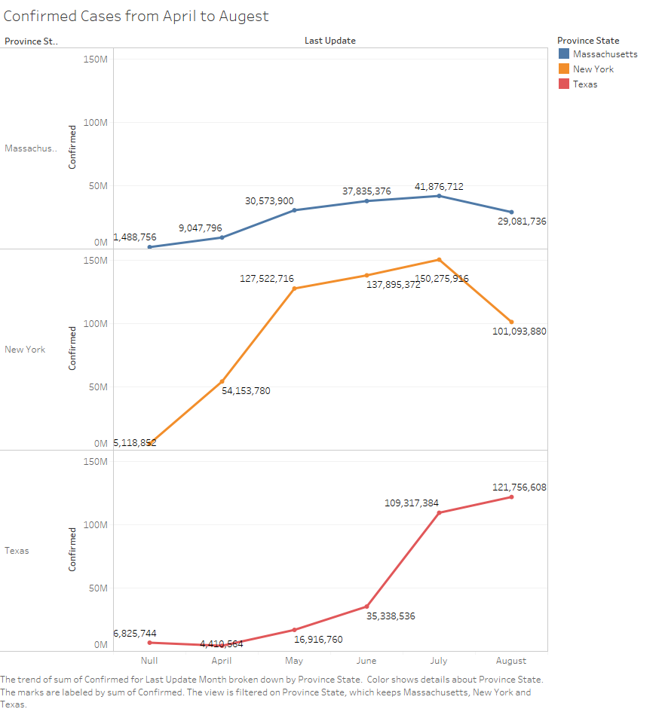

In [2]:
display(Image(filename='C:\\Users\\Robin\\Documents\\corona-analysis\\Comfirmed.png', embed=True))

In [3]:
combined_csv = pd.read_csv (r'combined_csv.csv')

States = ["New York", "Texas", "Massachusetts"]
df = combined_csv[combined_csv.Province_State.isin(States)]


df[['Date', 'Time']] = df.Last_Update.str.split(expand=True)

df['Date'] = pd.to_datetime(df['Date'])
df["death_rate"] = df["Deaths"]/df["Confirmed"]



#%%


ny_df = df[df.Province_State.str.contains("New York")]

tx_df = df[df.Province_State.str.contains("Texas")]

ma_df = df[df.Province_State.str.contains("Massachusetts")]



D:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Confirmed, dtype: object

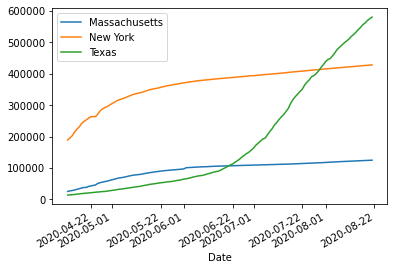

In [4]:
df.set_index('Date', inplace=True)
df.groupby('Province_State')['Confirmed'].plot(legend=True)

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: death_rate, dtype: object

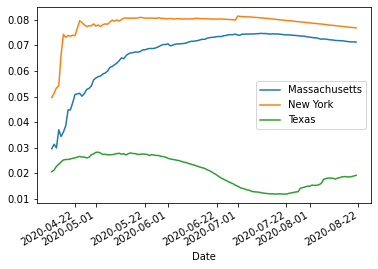

In [5]:

df.groupby('Province_State')['death_rate'].plot(legend=True)

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Mortality_Rate, dtype: object

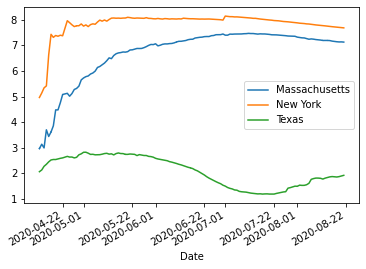

In [6]:
df.groupby("Province_State")["Mortality_Rate"].plot(legend = True)

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Testing_Rate, dtype: object

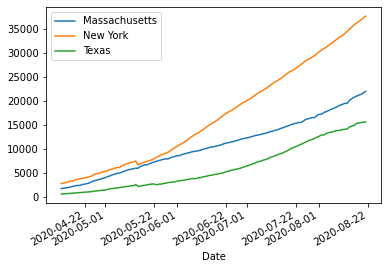

In [7]:
df.groupby("Province_State")["Testing_Rate"].plot(legend = True)

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Hospitalization_Rate, dtype: object

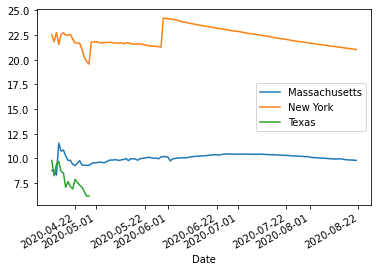

In [41]:
df.groupby("Province_State")["Hospitalization_Rate"].plot(legend = True)

In [43]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Time,death_rate,geometry
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-12,Massachusetts,US,2020-04-12 23:18:15,42.2302,-71.5301,25475,756,NaN,24719.0,25.0,...,116730.0,2235.0,2.967615,84000025.0,USA,1700.668379,8.773307,23:18:15,0.029676,POINT (42.230 -71.530)
2020-04-12,New York,US,2020-04-12 23:18:15,42.1657,-74.9481,189033,9385,23887.0,179648.0,36.0,...,461601.0,42594.0,4.964742,84000036.0,USA,2737.680538,22.532574,23:18:15,0.049647,POINT (42.166 -74.948)
2020-04-12,Texas,US,2020-04-12 23:18:15,31.0545,-97.5635,13677,283,2014.0,13394.0,48.0,...,124533.0,1338.0,2.069167,84000048.0,USA,541.811523,9.782847,23:18:15,0.020692,POINT (31.055 -97.564)
2020-04-13,Massachusetts,US,2020-04-13 23:07:54,42.2302,-71.5301,26867,844,NaN,26023.0,25.0,...,122049.0,2340.0,3.141400,84000025.0,USA,1778.162212,8.709569,23:07:54,0.031414,POINT (42.230 -71.530)
2020-04-13,New York,US,2020-04-13 23:07:54,42.1657,-74.9481,195749,10058,23887.0,185691.0,36.0,...,478357.0,42712.0,5.138213,84000036.0,USA,2837.057652,21.819779,23:07:54,0.051382,POINT (42.166 -74.948)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-20,New York,US,2020-08-20 04:30:22,42.1657,-74.9481,427202,32865,74328.0,320009.0,36.0,...,7272403.0,89995.0,7.693082,84000036.0,USA,37383.402453,21.066147,04:30:22,0.076931,POINT (42.166 -74.948)
2020-08-20,Texas,US,2020-08-20 04:30:22,31.0545,-97.5635,574633,10934,424685.0,139014.0,48.0,...,4517189.0,NaN,1.902780,84000048.0,USA,15578.726509,NaN,04:30:22,0.019028,POINT (31.055 -97.564)
2020-08-21,Massachusetts,US,2020-08-21 04:30:30,42.2302,-71.5301,124728,8888,102205.0,13635.0,25.0,...,1518522.0,12225.0,7.125906,84000025.0,USA,22031.502924,9.801328,04:30:30,0.071259,POINT (42.230 -71.530)


In [42]:

usa_latest = df[df['Date'] == max(df['Date'])]
usa_grouped = df.groupby('Province_State')['Confirmed', 'Deaths'].sum().reset_index()

KeyError: 'Date'